<div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right,steelblue, lightblue);overflow:hidden;box-shadow: 5px 5px 5px lightcoral;"><b> Time Series </b></div>

----

<div style="border-radius:10px; padding: 15px; background: linear-gradient(to left,white, lightcyan); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>1. What is time series data?</font></h3><br><h3 style="color:black; text-align:left; font-weight:normal;font-family:Calibri;">Time series data is a sequence of data points measured over time intervals. In other words, data is function of time f(t) = y Data points can be measured hourly, daily, weekly, monthly, quarterly, yearly and also with smaller or larger time scales such as seconds or decades.

----------

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Introduction to project :</font></h3><br>

In this project, we'll see the analysis of time series data, specifically focusing on uncovering trends and seasonal patterns. Our approach is rooted in econometrics, employing statistical methods to model the inherent properties of the data. The primary goal is forecasting future trends. Throughout the project, we explore key concepts in time series modeling, including components like trend and seasonality, aspects such as model fitting techniques, and relevant metrics. To achieve our objectives, we explore the SARIMAX model from the statsmodels library. Unlike the ARIMA model, which addresses trends only, SARIMA enables us to model both seasonality and trend simultaneously, enhancing the accuracy of our forecasts. This post encompasses various sections, covering a range of topics related to time series modeling with a focus on SARIMA.

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>1 . Introducing the Data :</font></h3><br>


We're studying house sales in 20 big US cities from 2000 to 2019. 

Imagine two maps of these sales: one shows "what you see" each month, with ups and downs due to seasons like holidays and cold weather. The other map is "adjusted" to remove these ups and downs, showing only the overall trend over time.

We're using the "what you see" map, because we want to understand how seasons affect sales. This helps us see if events like economic changes truly impact sales, or if their effects are hidden by winter chills or summer vacations.

Think of heating oil companies. Petrol prices drop, but oil prices climb in winter. Why? Because everyone needs heat! By removing the "winter boost" from the data, we might see that oil prices actually follow the petrol trend, with only a small seasonal bump.

Later, we'll dive deeper into how to separate these seasonal effects. This lets us understand the true stories hidden within the data.

So, remember: two maps, one shows "what you see", the other shows the "true trend". We're using the first one to learn how seasons and events affect house sales, just like figuring out why oil prices might seem confusing at first glance.

------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Required Libraries.</b>

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings(action='ignore')

In [207]:
hs= pd.read_csv(r"C:\Users\nehaw\Desktop\Class Material\Project\Home_sales_US.csv")

In [208]:
hs.head()

,DATE,SPCS20RPSNSA
0,2000-01-01,76273
1,2000-02-01,70994
2,2000-03-01,72795
3,2000-04-01,79561
4,2000-05-01,92584


In [209]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          286 non-null    object
 1   SPCS20RPSNSA  286 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


### Renaming the Column

In [210]:
hs.rename(columns={'SPCS20RPSNSA':'home_sale'},inplace=True)

In [211]:
hs.isnull().sum()[hs.isnull().sum()>0]


Series([], dtype: int64)

### convert object type of date into numeric
### Set DATE column as index

In [212]:
hs.DATE = pd.to_datetime(hs.DATE)
hs=hs.set_index('DATE')

In [213]:
hs.head()

,home_sale
DATE,
2000-01-01,76273
2000-02-01,70994
2000-03-01,72795
2000-04-01,79561
2000-05-01,92584


------------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Time Series Visualization.</b>

#### plot_data_properties(...) function plots time series data as well as autocorrelation and partial autocorrelation graphs and histogram of data points.

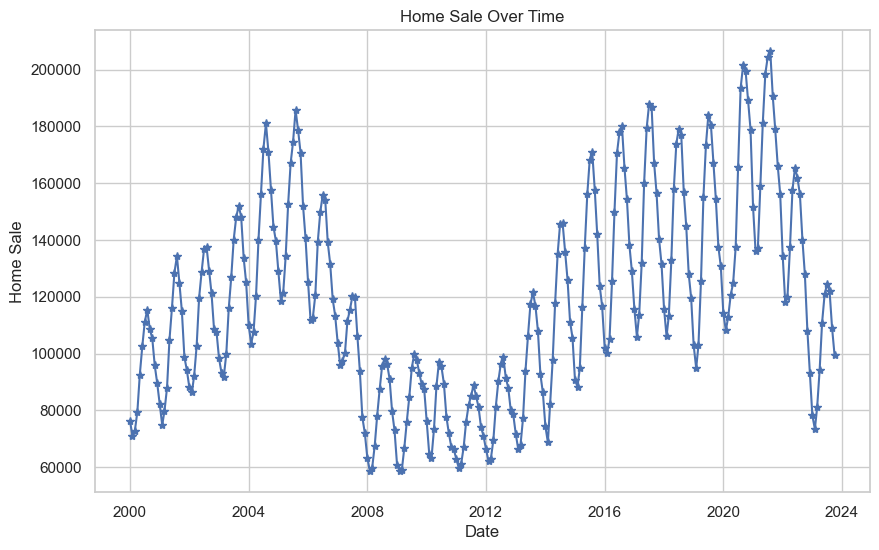

In [214]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot( hs['home_sale'], marker='*', linestyle='-', color='b')
plt.title('Home Sale Over Time')
plt.xlabel('Date')
plt.ylabel('Home Sale')
plt.show()

## 2 . Stationarity in time series data and why it is important

Talk about serial correlation and stationary data should look random If we look at the time series plot of the data we can observe an increasing trend in 2000-2006, a decreasing trend in home sales starting from 2007 till 2012 due to big financial crisis and increasing trend again till 2019. We can also absorve seasonality in the data as usually the housing market is not active at the beginning of a year and sales usually go high in mid-year and again sales getting lower by the end of the year. Seems like spring and summer are the good seasons for American housing market.

When we have trend and/or seasonality in a time series data we call it non-staionary. Why are we calling the data non-stationary and why are we scared of this phenomenon? Stationarity means the statistical properties of data, such as mean, variance, standard deviation remain constant over time. Why do we want the statistical properties to remain same over time? Well, because we make statistical assumptions (a good example could be OLS assumptions) about the data in due course of model building and the model will only be capable of performing under those assumptions. When the statistical properties of the data changes, the model is no longer capable of respresenting the true nature of data as data properties have been changed. That's why our forecasting/prediction results will no longer will be valid. Changing mean/variance will require us to fit another model and this model may be valid for a short period of time and again we have to dispose it and fit another model. See, how inefficient and unreliable this process looks like.

We have to make time series data staionary before fitting a model. We can make time series stationary by transforming the data. Usually, differencing is used to make the data stationary.

In [215]:
def plot_data_properties(hs, ts_plot_name="Time Series plot"):

    plt.figure(figsize=(16,4))
    plt.plot(hs)
    plt.title(ts_plot_name)
    plt.ylabel('Sales')
    plt.xlabel('Year')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(hs, ax=axes[0,0], lags=48);
    plot_pacf(hs, ax=axes[0,1], lags=48);
    sns.distplot(hs, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

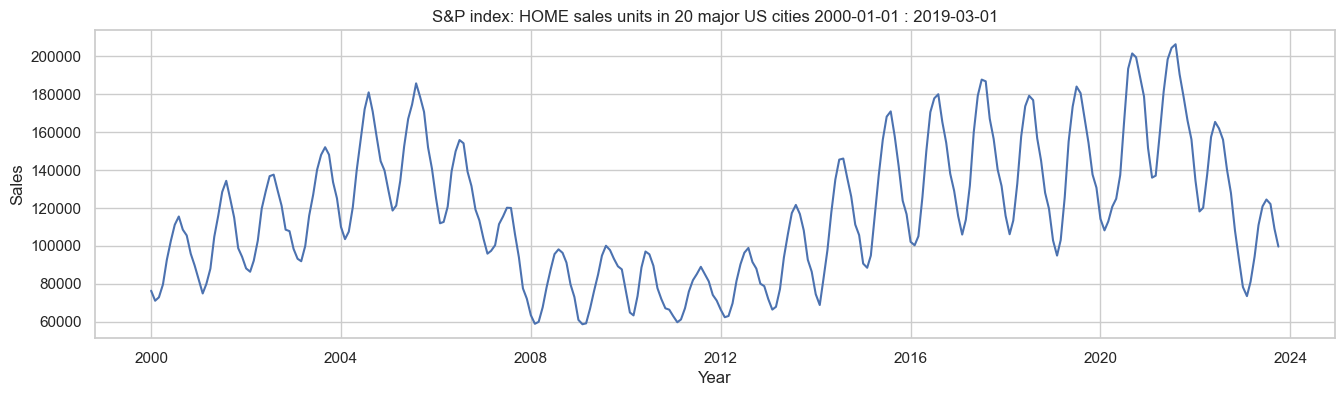

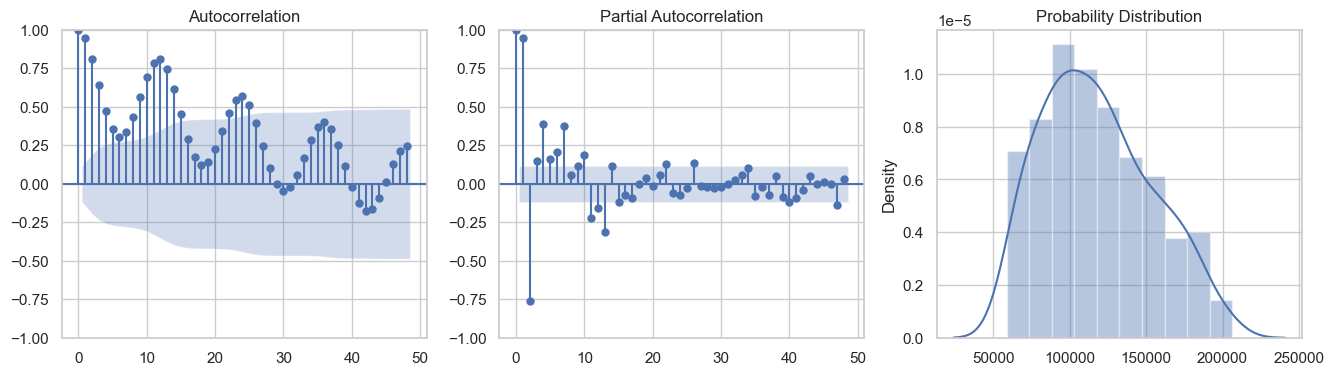

In [216]:
plot_data_properties(hs, 'S&P index: HOME sales units in 20 major US cities 2000-01-01 : 2019-03-01');

So, how can we test whether a time series data is staionary or not. The first is just eyeballing the time series plot and identify trend or seasonality, secondly you may divide the data into 3 different sets and calculate mean and variance for each set and confirm whether mean and variance for each set is substantially different or not. Third option is to use one of the statistical tests provided in statsmodels library. Augmented Dickey Fuller test is the most popular amongst others, where null hypohtesis H_0 = data is not stationary. ADF test result provides test statistic and P value. P value >= 0.05 means the data is not stationary, otherwise we reject the null hypothesis and say data is stationary. I assume you know what hypothesis testing is and what P value means. If you are not quite familiar with these terms, then look at the p value and if it is smaller than 0.05 (p value < 0.05) then data is stationary, if p value >= 0.05 data is not stationary.

The original data is not stationary as it has trend and seasonality components. ADF test confirms non-stationarity of the data.

You can also look at Autocorrelation plot, above and observe autocorrelation at lags=12 and 24 are significant. Autocorrelation plot shows the correlation of time series data with its own lagged values. For example, autocorrelation at lag=1, shows the correlation of y_t and y_t-1. At lag=2 corr(y_t, y_t-2). At lag=12 corr(y_t, y_t-12). So, at this plot every data point at time t has high correlation with at time t-12, which means a data point is correlated with the data at this month last year. You can notice high correlation from the example scatterplots below. Blue shaded area at autocorrelation plot shows significance level. So, correlation coefficients within the shaded show weak correlation at those lags, so we don't consider them significant. The partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values. PACF removes the correlation contribution of other lags and gives the pure correlation between two lags without the effect of others. We use ACF and PACF to choose a correct order for AR(p) and MA(q) values of ARIMA model. For AR order p look at PACF plot and choose lag value which has significant correlation factor before correlations get insignificant. For MA order q look at ACF plot and do the same. Don't forget you should only get these values from the acf and pacf plots of stationary time series. So, in our case we have to make the data stationary.

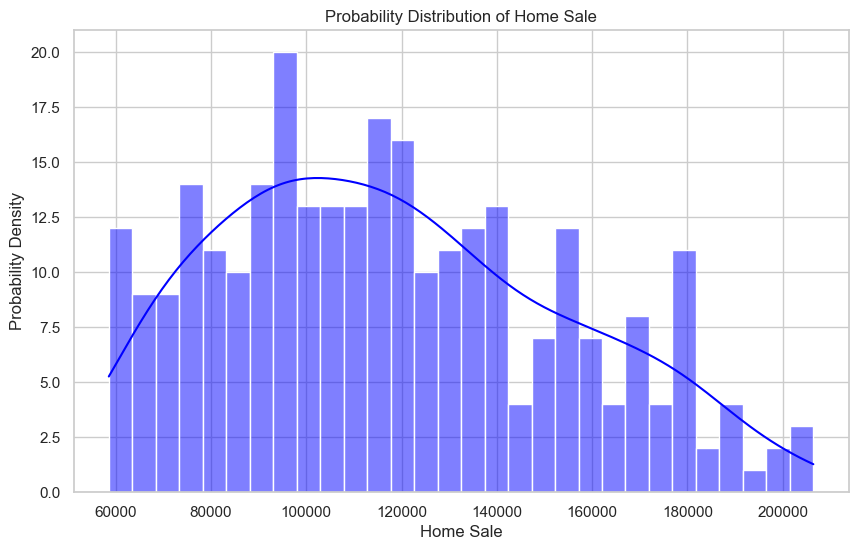

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'home_sale' is the column for which you want to create the distribution plot
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the probability distribution plot
sns.histplot(hs['home_sale'], kde=True, color='blue', bins=30)

plt.title('Probability Distribution of Home Sale')
plt.xlabel('Home Sale')
plt.ylabel('Probability Density')
plt.show()

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Seasonal decomposition.</b>

## 3.Seasonal decomposition and Time series components: Trend, Seasonality, Cycles, Residuals


Time series data Y is composed of a combination of Trend, Cycles, Seasonality and Residuals. Obviously, you may come across with time series where it doesn't have a Trend, Cycles or Seasonality. So, it is your task to identify the componenets of Y. Trend - long-term updward or downward movement. Cycle - periodic variation due to economic movements. It is different from seasonal variation. Cycle is the variation in autoregressive component of time series data. Cycles occur within longer time intervals such as every 6-10 years, whereas seasonal variation occurs in shorter time intervals. Seasonality - variation in data caused by seasonal effects. Ice cream sales are high in summer, heating oil sales are high in winter but low in summer. Residuals - a componenet that is left after other components have been calculated and removed from time series data. It is randomly distributed. Follows ~ N(0,1)

Statsmodels library has a function called seasonal_decompose, which decomposes Y into Trend, Seasonality and Residuals. Although, it is a naive decomposition algorithm, in practice it is very intuitive and works well for time series data where T, S and R are obvious. Before explaining the below graphs I would like to talk about the interaction among these components. Time series data Y can take either an additive or a multiplicative form. In additive form time series Y is formed by the sum of time series components, namely, T,S,C,R: Y = T + C + S + R

In multiplicative form time series Y is formed by the product of time series components: Y = T * C * S * R

Your task will be to identify whether Y is multiplicative or additive first, in order to decompose the series correctly and build a right model. If you carefully look at the time series plot of Housing index you may notice that the seasonal variation (seasonality) gets smaller when the trend decreases (years 2008-2013) and gets bigger when the trend increases (years 2014-2019). This happens in multiplicative time series, where small value for trend T results in small S, because we multiply S by T. In additive time series you don't experience this phenomenon.

We decompose time series data into Trend, Seasonal componenet and Residuals. We use seasonal_decompose() function from statsmodels to decompose and plot the componenets. Don't be surprised if the function returns all 3 componenets even though you assume that they do not exist for a particular time series data. In reality these components are generated by a simple algorithm involving simple math, that's why the decomposition function cannot say a component doesn't exist, even though the calculated value is not significant. So, you will see these three components for any time series data. You have to know how to read the results and decide which model (ARIMA or SARIMA) to fit to the data

In [233]:
test_start_date = '2018-01-01'
training_data = hs[:test_start_date]
test_data = hs[test_start_date:]

In [234]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    '''
    Summary:
    -------
    Performs Adfuller test on given time series data to test stationarity.
    p_val >= 0.05 means the data is not stationary, otherwise (p_val < 0.05) it is stationary.
    
    Parameters:
    data(pd.Dataframe, pd.Series. np.array): Time series data to be tested
    
    Return:
    ------
    '''
    p_val=adfuller(hs['home_sale'])[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val))

In [235]:
test_stationarity(hs)

Time series data is not stationary. Adfuller test pvalue=0.06950071465089562


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [240]:
dec=seasonal_decompose(hs.home_sale)

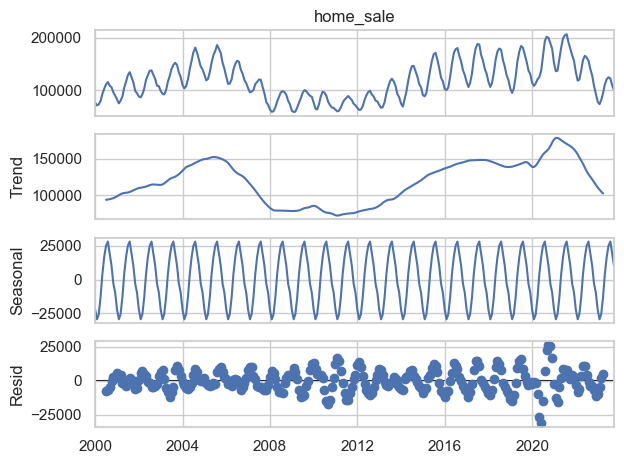

In [241]:
dec.plot();

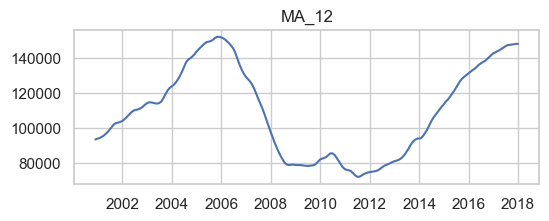

In [248]:
#Trend is moving avg
ma_12 = training_data.rolling(window=12).mean()
plt.figure(figsize=(6,2));
plt.plot(ma_12);
plt.title('MA_12');

The Resid plot shows Red marked y value y=1.2 means in July-2000 there was 20% more sales. In other words, June has a seasonal effect of 20% or 1.2 * T. Green marked y value y=0.8 in Feb-2003 there was 20% less sales. February has a negative seasonal effect on data. So, for some time series data you may see seasonal effect is very small i.e y=0.0001. It shows a very small seasonal effect, which shouldn't even be considered as a seasonal effect.

#### There are some other ways to observe seasonality. For example, in the below graph I have plotted home sales for each year. And as you can see every year follows pretty much the same pattern with slight difference. House sales are high in summer, lower in winter months.

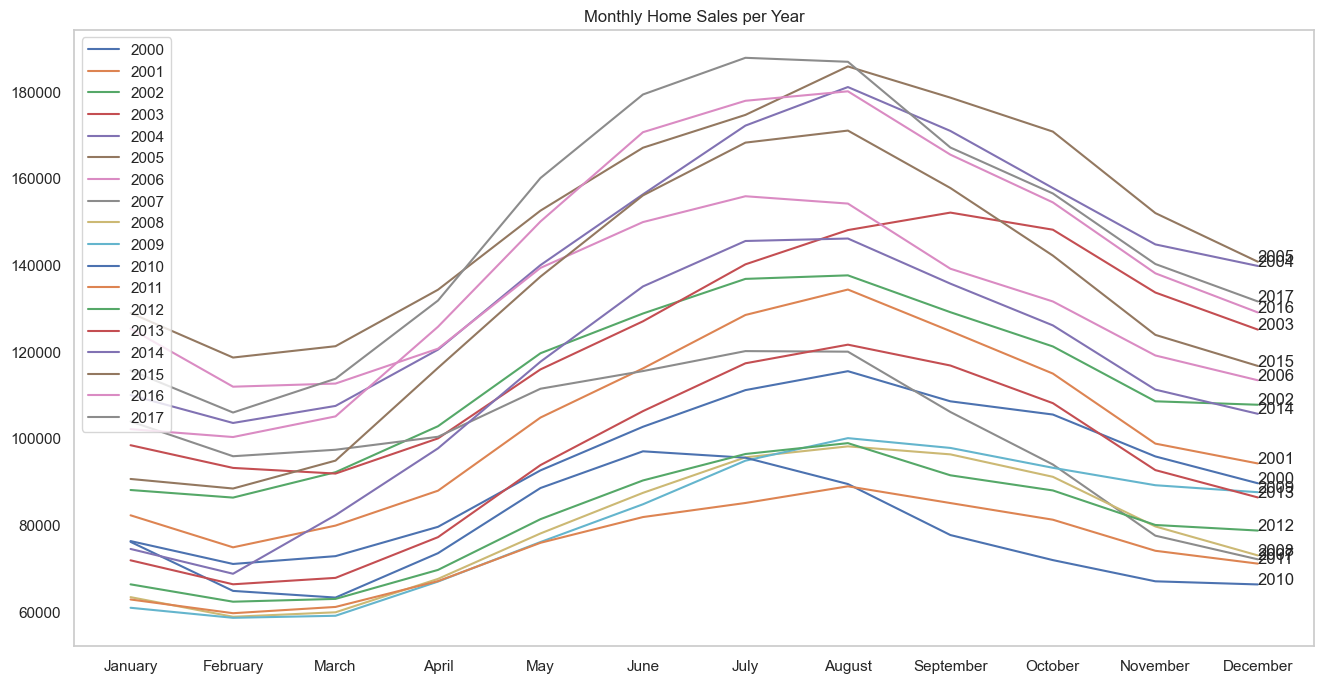

In [74]:
plt.figure(figsize=(16,8))
plt.grid(which='both')
years = int(np.round(len(training_data)/12))
for i in range(years):
    index = training_data.index[i*12:(i+1)*12]
    plt.plot(training_data.index[:12].month_name(),training_data.loc[index].values);
    plt.text(y=training_data.loc[index].values[11], x=11, s=training_data.index.year.unique()[i]);
plt.legend(training_data.index.year.unique(), loc=0);
plt.title('Monthly Home Sales per Year');

---------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Log Transformed.</b>

### 7. Data transformation: Log transformation and differencing

Home sales index data can be formulated as a multiplicative model where Y= TSR. I am ignoring Cycles, as it is not actually present in this data. (S)ARIMA models are linear models, like Linear Regression. We can not fit a linear model SARIMA to data generated by a process Y = TSR. We have to make Y linear before fitting a linear model. As you are aware of from math Log(a*b) = log(a) + log(b). We have to logtransform the data to make it linear. log(Y) = log(T) + log(S) + log(R). Log transformation makes data linear and smoother. Sometimes, log transformation on itself can make data stationary, which is not the case here. We have to take 1st order of Integration (differencing) to remove trend and take 12th order integration to remove seasonality from the data. Then the series will be stationary.

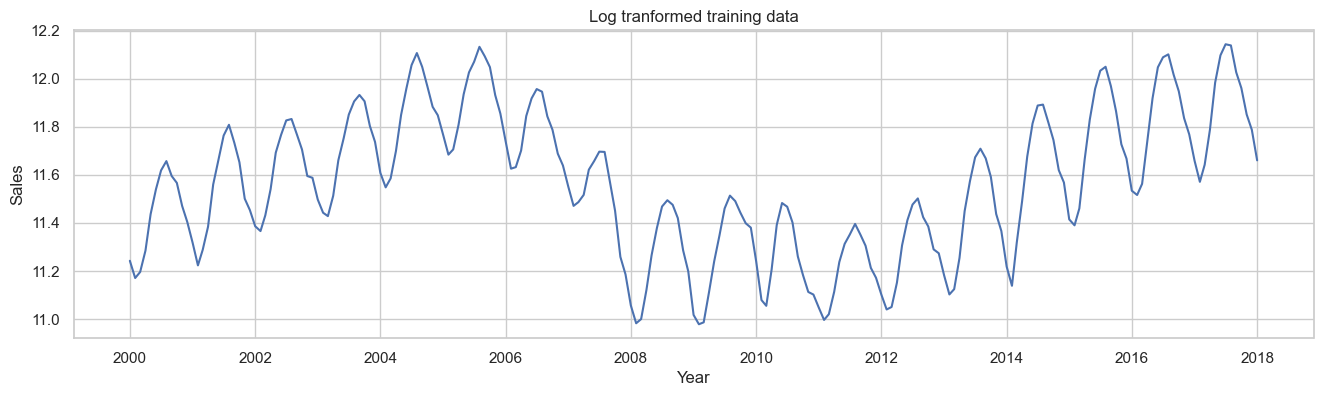

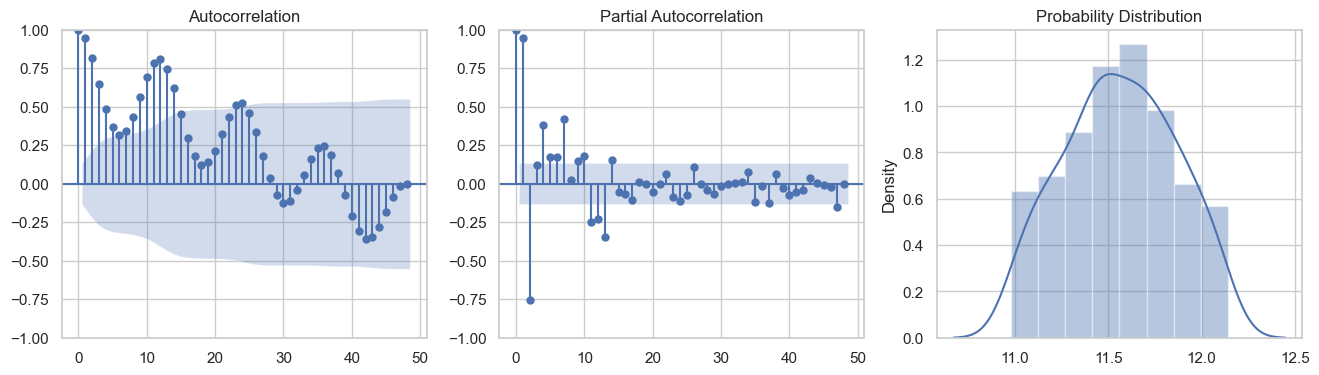

In [252]:
log_transformed_data = np.log(training_data)
plot_data_properties(log_transformed_data, 'Log tranformed training data')

In [89]:
test_stationarity(log_transformed_data)

Time series data is not stationary. Adfuller test pvalue=0.2260831332230781


-------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Log transformed and differenced data.</b>

Differencing is a basic operation or data transformation. It is the difference between y at time=t and y at time=t-x.
Differencing makes the data stationary as it removes time series components from the data and you are left with residuals. Notice, first order differencing took away only Trend not Seasonality.

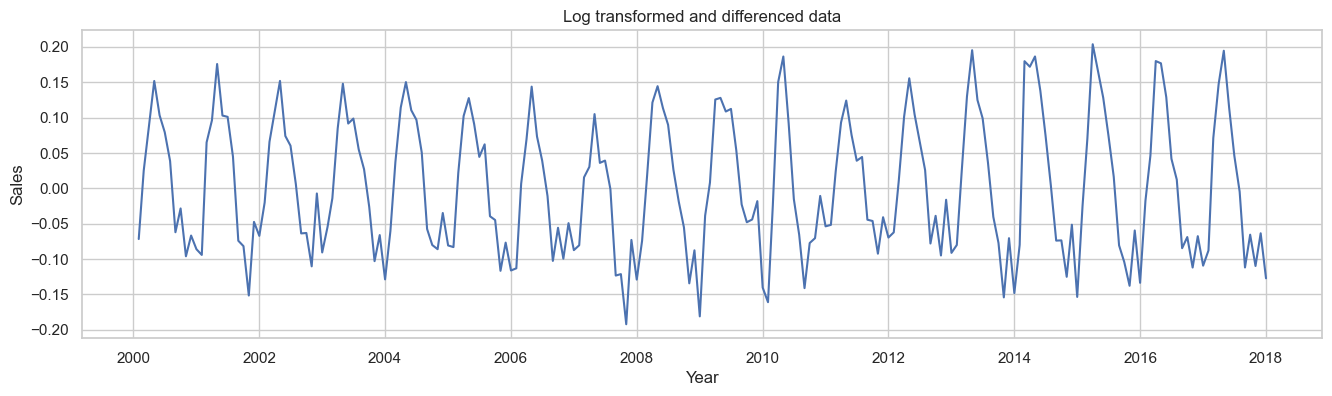

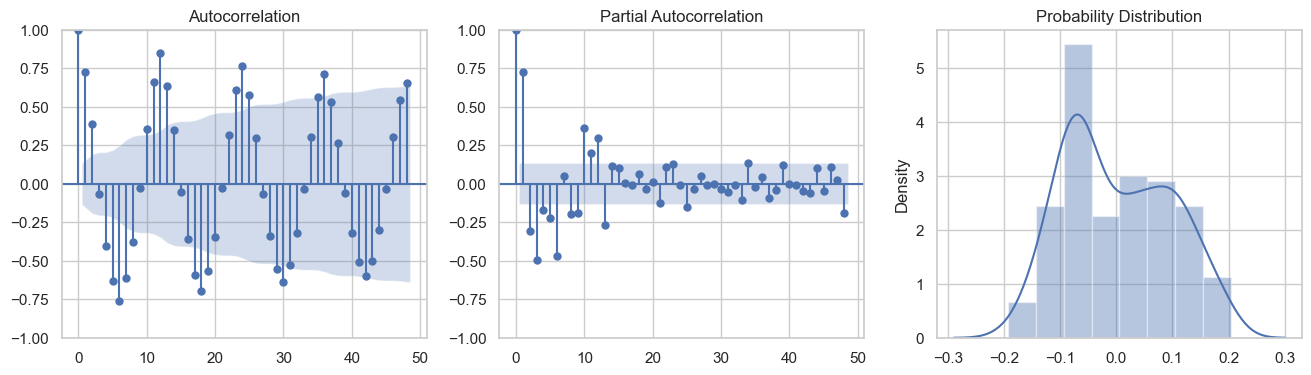

In [256]:
logged_diffed_data = log_transformed_data.diff()[1:]
plot_data_properties(logged_diffed_data, 'Log transformed and differenced data')

In [257]:
test_stationarity(logged_diffed_data)

Time series data is not stationary. Adfuller test pvalue=0.06950071465089562


-----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Log transofrmed, diff=1 and seasonally differenced data.</b>

We have to take 12th order difference to remove seasonality. You may ask how I decided to take 12th order difference not 6th or 8th or other order. We have discussed in seasonality section. Monthly data has seasonality at lag=12, weekly has at lag=4 and daily has at lag=30. However, you can also look at the ACF of log transformed data and see, serial correlation is very strong.

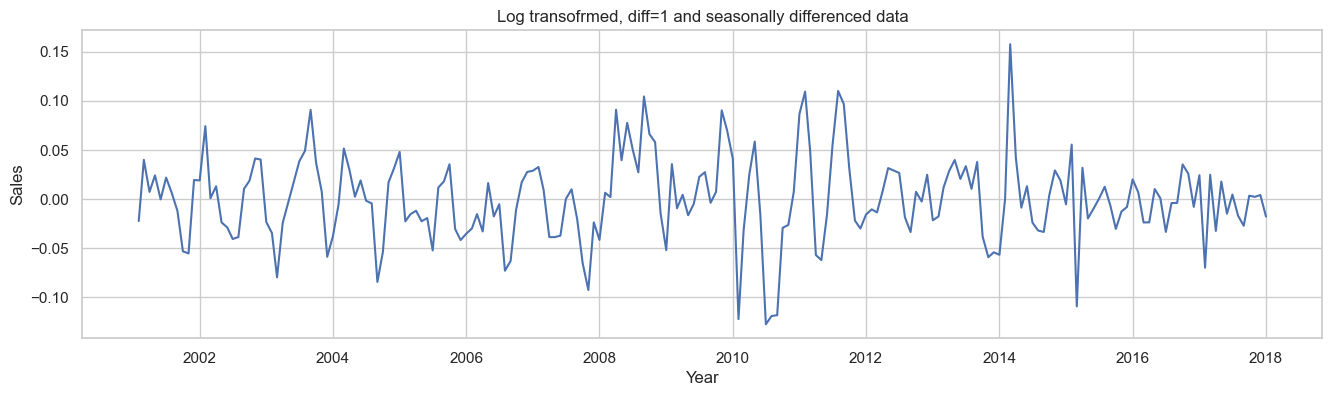

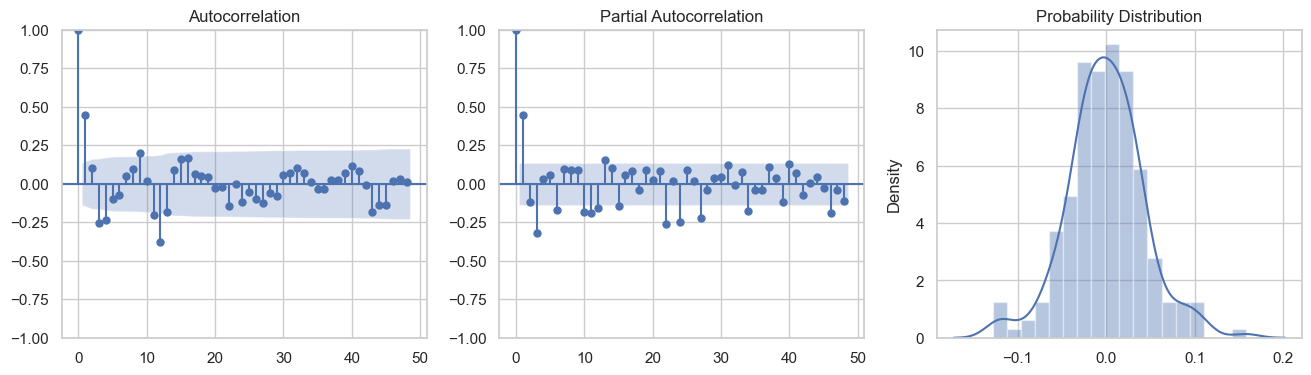

In [258]:
seasonally_diffed_data = logged_diffed_data.diff(12)[12:]
plot_data_properties(seasonally_diffed_data, 'Log transofrmed, diff=1 and seasonally differenced data')

In [93]:
test_stationarity(seasonally_diffed_data)


Time series data is stationary. Adfuller test pvalue=0.0006250945475048739


Data is stationary now. If you look at the histogram of data it looks like Normal Distribution. I have used Shapiro normality test below to confirm that the data is normally distributed. It is one of the properties of stationary data. So, why differencing makes the data stationary? By differencing you only get the small changes of y between time steps. These changes usually are normally distributed with constant mean and variance, which is a charecteristic of stationary data.

--------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Model Fitting</b>

As transformed data is stationary now we can proceed to model fitting phase. We had a brief chat about SARIMA before. I want to eloborate on this particular model. SARIMA, Seasonal ARIMA is a special member of ARIMA family which can model seasonal componenet of time series data. Just to recap what ARIMA means: AR - Auto Regressive model means time series data is regressed on its lagged values. Lagged values become independent variables, whereas time series itself becomes the dependent variable. y = a_0 + a_1y_t-1 + a_2y_t-2, ....., a_k*y_t-k. The main task here is to choose how many time steps to be used as independent variables. Please, do not let the word time series or lagged values to confuse you, they are just independent variables. In linear Regression, you could look at the correlation between independent and dependent variables and choose highly correlated variables as your features. Here you should do the same. But, you don't have to calculate correlation between lagged values and target variable, because you can use PACF to determine how many lags to use. PACF of stationary data has significant autocorrelation at lag=1 and the next autocorrelation at Lag=2 becomes insignificant. Ideally, AR order p should be 1. However, we will see in the model selection process that, we have to do parameter search on p to find the optimal value. However, initial guess will define on which values you should do grid search. In this case p = [0-2] would be sufficient.

I - order of integration: Basically, how many times you have differenced the data. We had it once d=1. Do not forget to fit the model to not differenced data when you set parameter d=1, as the algorithm will difference it. If you will fit on stationary data, that you dont need differencing anymore, d=0. We need differencing just to make the data stationary.

MA - Moving Average model: Time series is y regressed on resdiuals w. y = a_0 + a_1w1 + a_2w2 + .... + a_k*wk Look at ACF plot to determine the order (q) of MA part of ARIMA model.ACF suggest order q=1 for MA part of the ARIMA model. However, we should do grid search to find an optimal model. I suggest to look at values q=[0-2]

Seasonal model - Seasonality has to be modelled together with AR and MA and it has 4 parameters (P,D,Q,s). Think of P, D and Q parameters being similar to AR, I and MA parameters, but only for seasonal componenet of the series. Choose P by looking at PACF and Q by looking at ACF. Number of seasonal differences have been taken is D. Frequency of seasonal effect is defined by s. P = 1 - because we have significant correlation at lag=12, however they are not strong enough and we may not need to have an AR variable in the model. That's why we should grid search on P = [0-2]

D=1 - we difference for seasonality once

Q=1 - as we have strong correlation at lag=12 according to ACF plot. Let's perform grid search on parameter Q=[0-2], too.

s=12 - seasonality frequency, every 12 months

----

## lets build the model where seasonality is considered

In [263]:
import pmdarima
from pmdarima import auto_arima

In [264]:
hs_log = np.log(hs)

In [154]:
auto_arima(hs_log, seasonal=True, m = 12)

ARIMA(order=(5, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [155]:
model_sarima = SARIMAX(hs_log, order = (5,1,2), seasonal_order= (1,0,1,12))
results = model_sarima.fit()

In [156]:
pred_log = results.predict(start = 286, end = 310)
pred = np.exp(pred_log)
pred = np.round(pred)

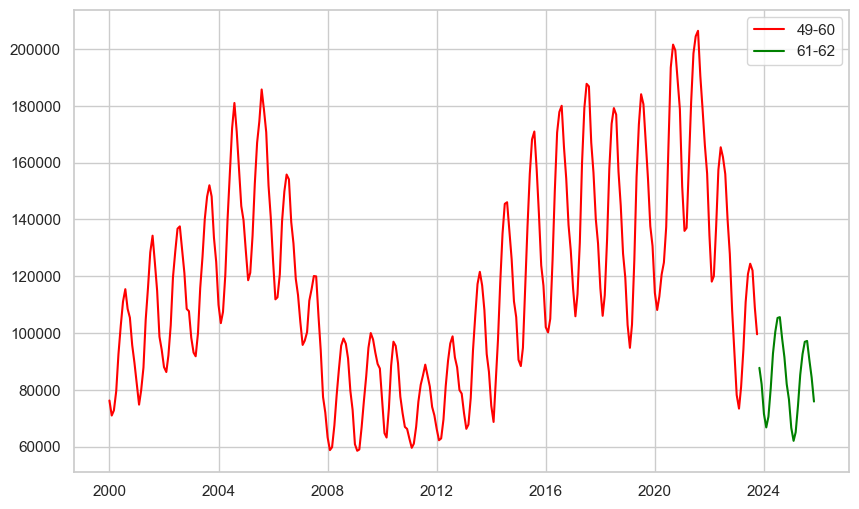

In [157]:
plt.figure(figsize=(10,6))
plt.plot(hs,color = 'red', label = '49-60')
plt.plot(pred,color = 'green', label = '61-62')
plt.legend()

Plot the predicted values with original data and see the results. What can we infor from the below plot? Well a lot! The model can successfully capture the seasonal effect,same with trend. Home sales goes dowmward trend, however the model cannot capture it well. It knows that sales goes downward but due to seasonal effect, however there is a upword trend after 2024 which it struggles to predict. This is due to small training data we have got. If we had a larger data set, we could identify an economic cycle, and model it. Possibly, every 6-7 years housing sales follows a reduction. Or if this downward trend continue in 2019 our 2020 prediction would definitely capture the trend.after 2024 there will be a chnaces to sale goes high with trend of the model

---
---

we have build the  model on entire data, 
but now lets do the sampling and divide data into train and test

random sampling is not possible

build the model on train and test it on test and find mape

In [161]:
hs= pd.read_csv(r"C:\Users\nehaw\Desktop\Class Material\Project\Home_sales_US.csv")

In [162]:
hs.rename(columns={'SPCS20RPSNSA':'home_sale'},inplace=True)

In [163]:
hs.DATE = pd.to_datetime(hs.DATE )
hs = hs.set_index('DATE')
hs_log = np.log(hs)

In [175]:
hs_train = hs_log.iloc[0:275]
hs_test = hs_log.iloc[275:286]

In [176]:
auto_arima(hs_train, seasonal=True, m = 12)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [177]:
model_sarima = SARIMAX(hs_train, order = (0,1,2), seasonal_order= (1,0,1,12))

In [178]:
results = model_sarima.fit()

In [179]:
pred = results.predict(start = 275, end = 285)
pred = np.exp(pred)
pred = np.round(pred)


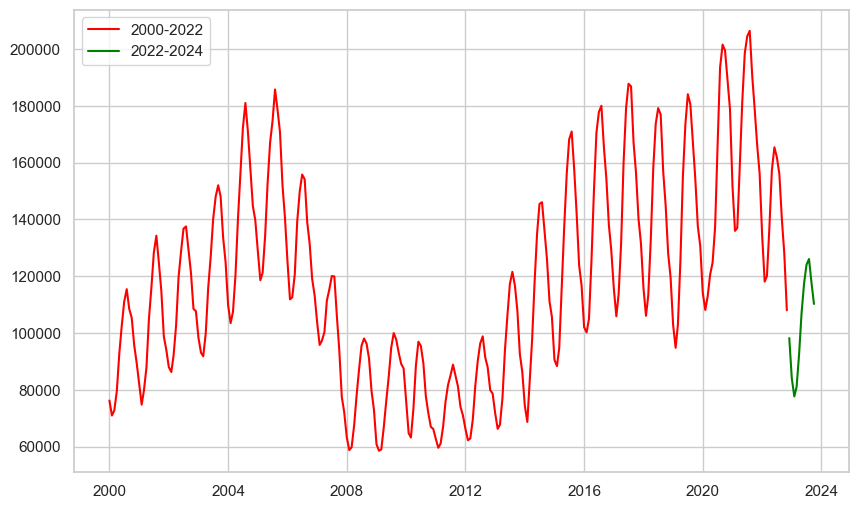

In [266]:
plt.figure(figsize=(10,6))
plt.plot(np.exp(hs_train),color = 'red', label = '2000-2022')
plt.plot(pred,color = 'green', label = '2022-2024')
plt.legend()

---

In [181]:
actual = np.exp(hs_test.home_sale)

err = actual - pred

In [182]:
mape = np.mean(np.abs(err * 100 / actual ))
mape

4.492598930955591

In [183]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error

In [184]:
mape(np.exp(hs_test.home_sale), pred)

0.0449259893095559

---

Text(0, 0.5, 'Home Sale')

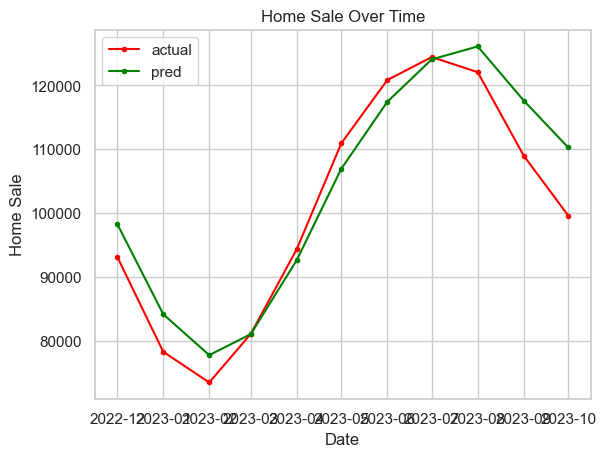

In [267]:
plt.plot(np.exp(hs_test), color = 'red', label = 'actual', marker = '.')
plt.plot(pred, color = 'green', label = 'pred', marker = '.')
plt.legend()
plt.title('Home Sale Over Time')
plt.xlabel('Date')
plt.ylabel('Home Sale')

---
---

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Conclusion</b>


The average price of homes in the United States has increased steadily over the past 11 years.
The predicted prices are generally accurate, although there are some slight differences between the actual and predicted prices.
The largest differences between the actual and predicted prices are in 2000 and 2024.
Here are some potential applications of this data:

This data could be used by real estate agents to help them price homes more accurately.
It could also be used by lenders to determine how much money to lend to borrowers.
Investors could use this data to track the housing market and make investment decisions.
Overall, the graph shows that the average price of homes in the United States has been increasing steadily over the past 11 years. This data could be useful for a variety of purposes, including real estate pricing, lending, and investing.